# Importing header files: -

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Reading the data: -

In [2]:
data = pd.read_csv('data/train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df = data.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# List of all features: -

In [5]:
col = df.columns.tolist()
col

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

## Description of each Feature: -
### 1 PassengerId: Unique ID of each passenger
### 2 Survived: 1 for survived 0 for dead
### 3 Pclass: Passenger Class
### 4 Name: Name of the Passenger 
### 5 Sex: Gender of Passenger
### 6 Age: Age of Passenger
### 7 SibSp: Number of sibling or spouses
### 8 Parch: Number of children + parents
### 9 Ticket: Ticket Number
### 10 Fare: Fares Price
### 11 Cabin: Cabin class
### 12 Embarked: Destination of a passenger

# Dimensions of the dataset: -

In [6]:
df.shape

(891, 12)

In [7]:
df_missing = pd.DataFrame(df.isnull().sum(), columns=['missing'])

In [8]:
df_missing = pd.DataFrame(df.isnull().sum(), columns=['missing'])
df_missing = df_missing[df_missing['missing'] > 0]
df_missing

,missing
Age,177
Cabin,687
Embarked,2


# Passenger ID won't be needed
## So we drop PassengerId

In [9]:
df.drop(labels= 'PassengerId', axis= 1, inplace=True)
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Number males and females on the ship: -

<AxesSubplot:xlabel='Sex', ylabel='count'>

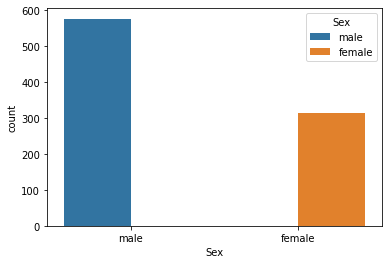

In [10]:
sns.countplot(x = 'Sex', data = df, hue='Sex')

In [31]:
gender = ['male', 'female']
genderCount = [len(df[df['Sex'] == 'male']), len(df[df['Sex'] == 'female'])]
genderPerc = [(len(df[df['Sex'] == 'male'])/df.shape[0])*100, (len(df[df['Sex'] == 'female'])/df.shape[0])*100]
df_context = {'Gender' : gender, 'Count': genderCount, 'Percentage': genderPerc}
df_Sex = pd.DataFrame(data = df_context)
df_Sex = df_Sex.set_index('Gender')
df_Sex

,Count,Percentage
Gender,,
male,577,64.758698
female,314,35.241302


# Number of people in each class: -

<function matplotlib.pyplot.show(close=None, block=None)>

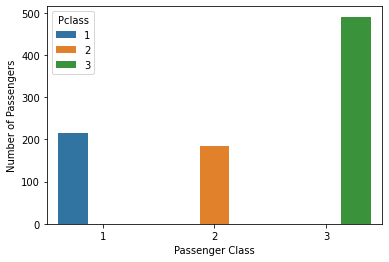

In [13]:
ax = sns.countplot(x = 'Pclass', data = df, hue='Pclass')
ax.set(xlabel = 'Passenger Class', ylabel = 'Number of Passengers')
plt.show

# Number of people survived: -

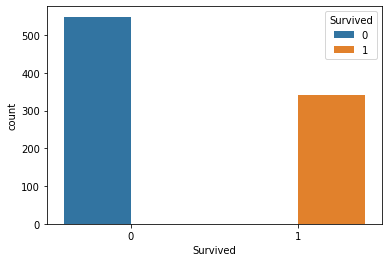

In [14]:
ax = sns.countplot(x = 'Survived', data = df, hue='Survived')
plt.show()

# Number of people survived w.r.t class: -

<AxesSubplot:xlabel='Pclass', ylabel='count'>

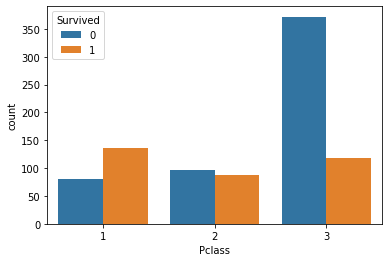

In [15]:
sns.countplot(x = 'Pclass', data= df, hue='Survived')

# test

In [16]:
f, ax = plt.subplot(3, 3, )


TypeError: subplot() takes 1 or 3 positional arguments but 2 were given

<Figure size 432x288 with 0 Axes>